# Analysis

In [1]:
import pandas as pd
from aaai20.io import filename_results

import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

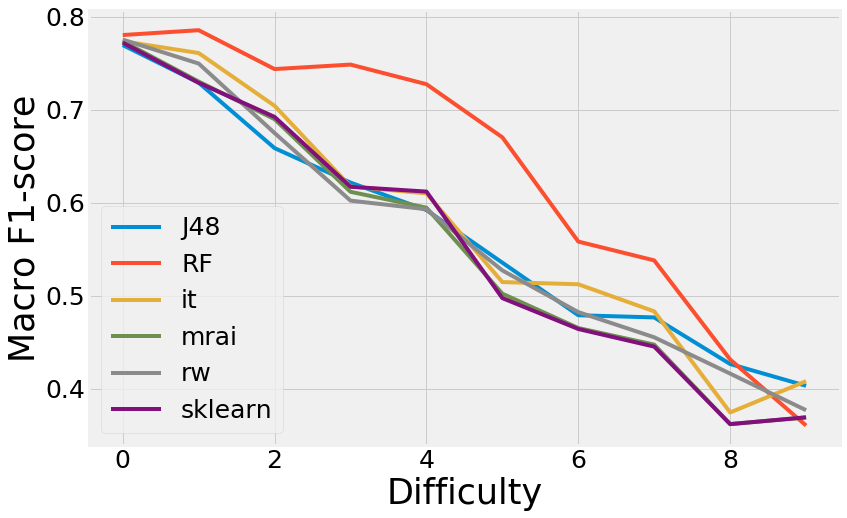

In [2]:
def plot(y_axis_quantity = 'f1_macro'):
    dfs = []
    for name in {'J48', 'RF', 'mi', 'mrai', 'it', 'rw'}:
        fn = filename_results(exp_dname='mercs-vs-weka', exp_fname=name)
        dfs.append(pd.read_csv(fn))

    #df = pd.concat(dfs, sort=True)
    df = pd.concat(dfs, sort=False)
    
    df_plot = df[['dataset', y_axis_quantity, 'difficulty', 'identifier']].groupby(by=['identifier', 'difficulty']).mean()
    
    # Visuals
    identifiers = df_plot.index.levels[0].unique().values.tolist()

    x = df_plot.index.levels[1].values.tolist()

    y = dict()
    labels = []

    fig=plt.figure(figsize=(12, 8))
    for trace in identifiers:
        y[trace] = df_plot.loc[trace].values
        plt.plot(x, y[trace])
        labels.append(trace)

    fontsize=35
    
    if 'macro' in y_axis_quantity:
        plt.ylabel('Macro F1-score', size=fontsize)
    else:
        plt.ylabel('Micro F1-score', size=fontsize)
    
    plt.xlabel('Difficulty', size=fontsize)
    
    plt.xticks(fontsize=fontsize-10)
    plt.yticks(fontsize=fontsize-10)
    
    plt.legend(labels, loc='lower left', prop=dict(size=fontsize-10))
    plt.show()
    return df

df = plot(y_axis_quantity = 'f1_macro')